<a href="https://colab.research.google.com/github/sammy-suyama/PythonBayesianMLBook/blob/main/chapter2/2_4_Numpyro%E3%81%AE%E6%A6%82%E8%A6%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title install packages
!pip install watermark
!pip install japanize-matplotlib
# !pip install jax==0.2.21
# !pip install numpyro==0.8.0
!pip install jax
!pip install numpyro

You should consider upgrading via the '/Users/sugiurahajime/programming/PythonBayesianMLBook/.venv/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sugiurahajime/programming/PythonBayesianMLBook/.venv/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sugiurahajime/programming/PythonBayesianMLBook/.venv/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sugiurahajime/programming/PythonBayesianMLBook/.venv/bin/python3.9 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

In [4]:
import jax 
import jax.numpy as jnp
import numpyro

/Users/sugiurahajime/programming/PythonBayesianMLBook/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# 観測データ
y = jnp.array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=float)

# モデルの定義
def model(y):
    # 事前分布のパラメータ
    alpha = jnp.array(1.0)
    beta = jnp.array(1.0)

    # 推論対象とするパラメータの事前分布
    theta = numpyro.sample("theta", numpyro.distributions.Beta(alpha, beta))
    
    # 観測データの数だけ生成
    with numpyro.plate("sample", len(y)):
        # 尤度関数
        numpyro.sample("obs", numpyro.distributions.Bernoulli(theta), obs=y)

In [6]:
# NUTSを指定
kernel = numpyro.infer.NUTS(model)
# MCMCクラスのインスタンス化
mcmc = numpyro.infer.MCMC(kernel, num_warmup=500, num_samples=2000, num_chains=3)

/var/folders/yc/fsbnfh950jbfby21gtfxgxyr0000gn/T/ipykernel_23643/1663765546.py:4: UserWarning: There are not enough devices to run parallel chains: expected 3 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(3)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(kernel, num_warmup=500, num_samples=2000, num_chains=3)


In [7]:
# MCMCの実行
mcmc.run(jax.random.PRNGKey(seed=1), y=y)

sample: 100%|██████████| 2500/2500 [00:03<00:00, 665.07it/s, 3 steps of size 1.03e+00. acc. prob=0.90]


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

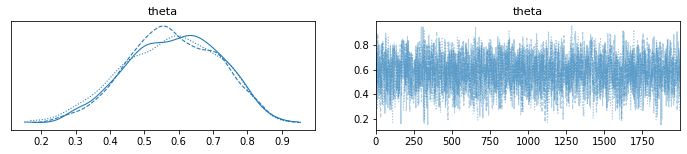

In [8]:
az.plot_trace(mcmc)

In [9]:
for var_info in az.rhat(mcmc).values():
  print(var_info.name, var_info.values.round(3),sep='')

theta1.001


mcmc sample mean: 0.582
mcmc sample std: 0.139
true posterior mean: nan
true posterior std: nan


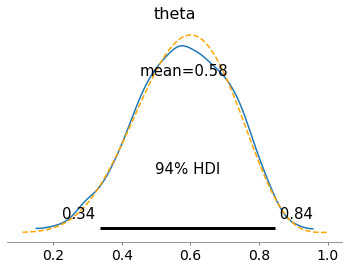

In [12]:
# MCMCサンプルを取得
samples = mcmc.get_samples()
# MCMCサンプルの可視化
ax = az.plot_posterior(samples)

x_lin = np.linspace(*ax.get_xlim())
# 真の事後分布
true_posterior = stats.beta(1 + np.sum(y), 1 + 10 - np.sum(y))
# 真の事後分布の可視化
ax.plot(x_lin, true_posterior.pdf(x_lin), ls='--', color='orange')

print('mcmc sample mean: {:.3f}'.format(samples['theta'].mean()))
print('mcmc sample std: {:.3f}'.format(samples['theta'].std()))
print('true posterior mean: {:.3f}'.format(true_posterior.mean()))
print('true posterior std: {:.3f}'.format(true_posterior.std()))

In [11]:
%load_ext watermark
%watermark --iversions

numpyro   : 0.9.2
jax       : 0.3.13
sys       : 3.9.12 (main, Mar 26 2022, 15:51:15) 
[Clang 13.1.6 (clang-1316.0.21.2)]
seaborn   : 0.11.2
matplotlib: 3.5.2
arviz     : 0.12.1
numpy     : 1.22.1
scipy     : 1.7.3
pandas    : 1.4.2

